# Introduction to neural network classification with tensorflow.

- ### A classification problem is where we try to classify something as one type or the other.
---

### There are various types of classification problems, given as

* Binary classification problem.
* Multiclass classification problem.
* Multilable classification problem.

---

## Creating our own data to view and fit.

### Note:
- This function and library is used to create a dummy dataset for classification problems.
- This function creates a large circle containing a smaller circle.
- This function returns "x" and "y".
-  n_samples represent the number of points used to create those 2 circles.
-  "x" we'll be an tensor of shape (n_samples, 2). So, basically every points x and y coordinates used to create those two circles.
-  "y" we'll be i.e 0 or 1 for each point. So, basically specifying to which circle(outer or inner) that point belongs to.

In [1]:
import random
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [2]:
# Making 1000 examples

n_samples = 1000

### Creating circles as our example

x, y = make_circles(n_samples, noise = 0.03, random_state = 42) # This is a binary classification problem.

In [3]:
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Our data is hard to understand as it is now, we'll try to visualize it. First we need to convert it into a dataframe.

In [5]:
circles = pd.DataFrame({"x0": x[:, 0], "x1": x[: ,1], "label": y})
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


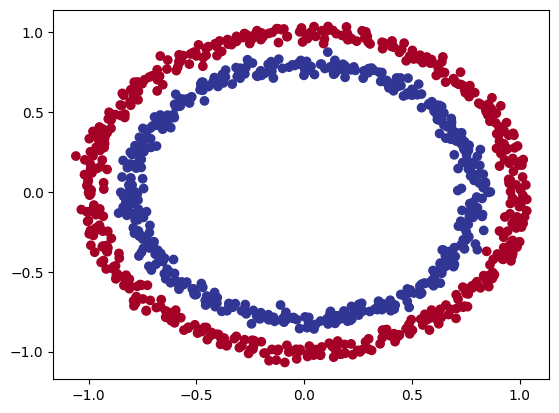

In [6]:
## visualizing our data

plt.scatter(x[:,0], x[:,1], c = y, cmap = plt.cm.RdYlBu);

## We'll create a model trying to classify whether a point belongs to red circle or blue circle.So, this is a binary classification problem.

In [7]:
## Checking our input and output shapes
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
# To check how many samples we have
len(x), len(y)

(1000, 1000)

In [9]:
# Viewing the first few samples of our data
x[0:5], y[0:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [10]:
# creating separate training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
len(x_train),len(x_test)

(800, 200)

In [11]:
## Now, building our tensorflow classification model.

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(x_train, y_train, epochs = 100, verbose = 0)

In [12]:
model_1.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 7.9712 


[7.971192836761475, 0.5]

### Our model accuracy is about 46% which is like guessing because we are using a binary classification problem.

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(x_train, y_train, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [14]:
model_2.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 0.6932 


[0.6931580305099487, 0.5]

### Still our model accuracy is less than 50% which is like guessing in a binary classification problem. So, now we need to use other ways to improve our model

In [15]:
# Now, we are trying after changing the optimizer.

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
                               ])


model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


model_3.fit(x_train, y_train, epochs = 100, verbose =0)

In [16]:
## Evaluating our model.

model_3.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4700 - loss: 0.6949 


[0.6948784589767456, 0.4699999988079071]

## Again no big improvement is seen. So, we'll create a function to visualize the predictions from our model.

This function will:

* Take in the trained model, features (x) and labels (y).

* Create a meshgrid of different x-values.

* Make predictions across the meshgrid.

* and then plot a predictions as well as a line between zones (where each unique class falls).

In [17]:
def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
 """


  x_min, x_max = x_test[:, 0].min() - 0.1, x_test[:, 0].max() + 0.1
  y_min, y_max = x_test[:, 1].min() - 0.1, x_test[:, 1].max() + 0.1

  xx, yy  = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))



  x_in = np.c_[xx.ravel(), yy.ravel()]
## Note: np.c_[], actually combines two arrays elementwise,
## Ex: np.c_[np.array([19, 8, 6]), np.array([18, 6, 7])] and the output is [[19, 18], [ 8,  6], [ 6,  7]].


  # Making predictions
  y_pred = model.predict(x_in)

  # Check for multi-classes

  if len(y_pred[0]) > 1:
    print("Doing multi-class classifiction")
    # Then we'll have to reshape our predictions to get them ready for plotting.
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred =np.round(y_pred).reshape(xx.shape)

  # plotting the decision boundary

  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(x_test[:,0], x_test[:,1], c = y, s =40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

- ### This plots the decision boundary created by a model predicting on x.

- ### Now, defining the axis boundaries of the plot and then creating a meshgrid.

  
- ### y_min and y_max defined here are actually the minimum and maximum values of the sample points on y-axis and it has nothing to do with our y (labels) column.

In [18]:
# This actually gives us the range of values for our plot.

x_min, x_max = x_test[:, 0].min() - 0.1, x_test[:, 0].max() + 0.1
y_min, y_max = x_test[:, 1].min() - 0.1, x_test[:, 1].max() + 0.1
x_min, x_max, y_min, y_max

(np.float64(-1.1036527520299177),
 np.float64(1.1167698425766002),
 np.float64(-1.094527941956522),
 np.float64(1.1351578040814592))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step
doing binary classification


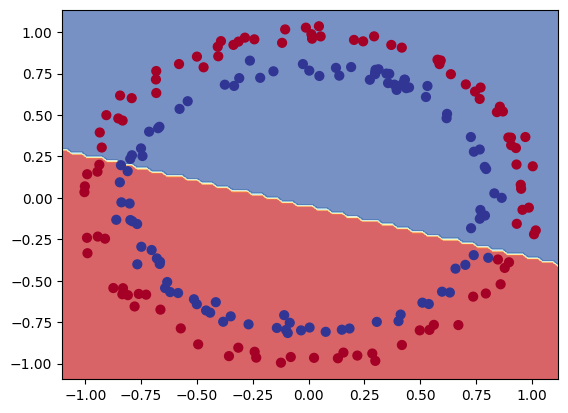

In [19]:
## Checking the predictions our model is making by visualizing them by using the function that we created.

plot_decision_boundary(model = model_3, x = x_test , y = y_test )

### From this plot we can clearly see, our model is performing really bad. Actually, our model is trying to fit a straight line between two classes like a linear regression model. In short we have a non-linear data and our model is trying to fit a linear line through it.

- #### Note: We made our predictions on the test dataset.

In [20]:
## Now, we'll try to introduce non-linearity in our model.

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(100, activation = "relu"), ## Note: we can also use "activation = tf.keras.activation.relu".
                               tf.keras.layers.Dense(10, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "softmax")])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

# Note: we can also specify loss = "Binary_crossentropy" and optimizer = "Adam".
## This works the same as tf.keras.losses.BinaryCrossentropy() and tf.keras.optimizers.Adam().
# The advantage of specifying optimizer as, optimizer = tf.keras.optimizers.Adam()
## is that in this format we can also specify the learning rate as tf.keras.optimizers.Adam(lr = 0.01)
## Default learning rate for "Adam" is 0.001

model_4.fit(x_train,y_train, epochs = 100, verbose = 0)

/Users/harish./Desktop/git_repos/new_tfhub_env/lib/python3.11/site-packages/keras/src/ops/nn.py:938: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [21]:
model_4.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 0.0211 


/Users/harish./Desktop/git_repos/new_tfhub_env/lib/python3.11/site-packages/keras/src/ops/nn.py:938: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


[0.021132195368409157, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step
doing binary classification


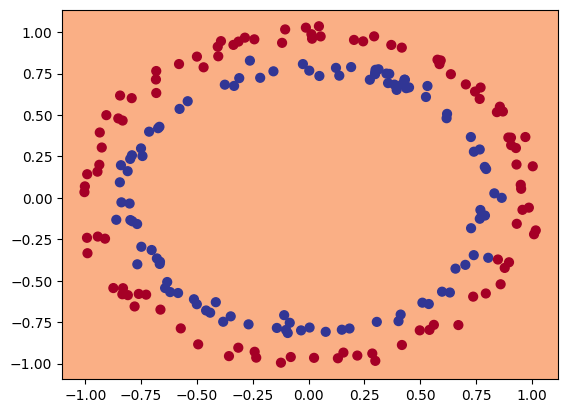

In [22]:
## Still no improvement and we again try to plot our model decision boundary

plot_decision_boundary(model_4, x_test, y_test)

# from this plot also we can't say much about predictions.

### At this point we have tried almost everything we could to improve our model:
- We added extra layers, we added extra neurons, we added activation functions on input and output layer, changed optimizers, loss functions and so on.

---

### But still our model is not performing good. But now, after looking at the resources we got to know
- **For binary classification problem we use "sigmoid" activation function in the output layer and we also use a single neuron in the output layer.**


In [23]:
# Now, creatung a new model with sigmoid activation function in the output layer.

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.Dense(100, activation = "relu"),
                               tf.keras.layers.Dense(10, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


model_5.fit(x_train,y_train,epochs = 100, verbose =0)

In [24]:
model_5.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0156 


[0.01559767872095108, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step
doing binary classification


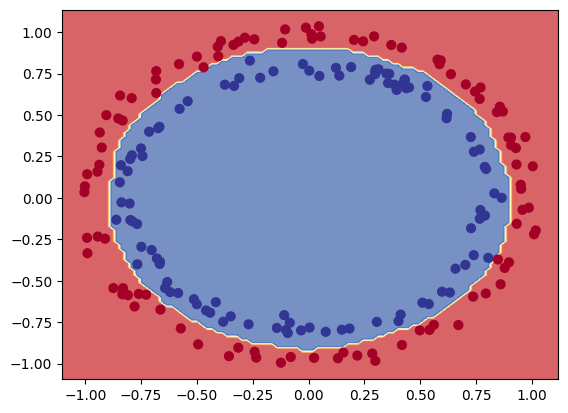

In [25]:
plot_decision_boundary(model_5,x_test,y_test)

# From this plot we can clearly see our model is performing excellent classification with the accuracy of 100 %.

## Now, we'll focus on activation functions from scratch.

In [26]:
# Creating another toy data for the explanation of our activation functions.

toy_data = tf.cast(tf.range(-10,10), tf.float32)
toy_data

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

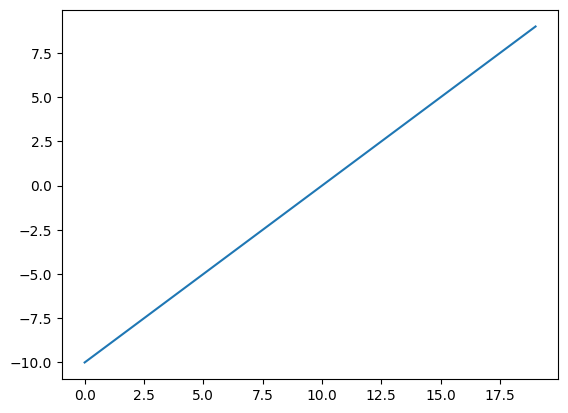

In [27]:
# Visualising our toy data.

plt.plot(toy_data)

# This is a linear data.
# Note: when we don't use an activation function we are actually using a linear activation function and this line represents a linear activation function.

In [28]:
# Trying to replicate the sigmoid activation function from scratch.

def sigmoid(x):
  o = 1/(1+tf.exp(-x))
  return o


In [29]:
# Now using our sigmoid activation function.

toy_after_sigmoid = sigmoid(toy_data)
toy_after_sigmoid

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

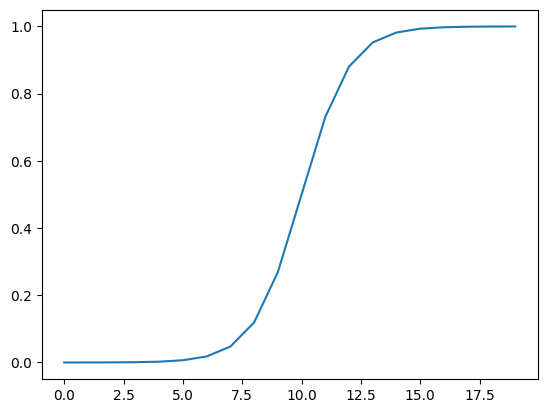

In [30]:
plt.plot(toy_after_sigmoid)

In [31]:
# Now, creating a relu (rectified linear unit) activation function.

def relu(x):
  o = tf.maximum(0,x)
  return o

# This function actually returns the maximum value between 0 and x.

In [32]:
toy_after_relu = relu(toy_data)
toy_after_relu

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

### Our toy_data had 20 values and out of those 20 values 10 were positive and 10 were negative. After passing our data through relu we have 10 values of 0 and 10 positive values.

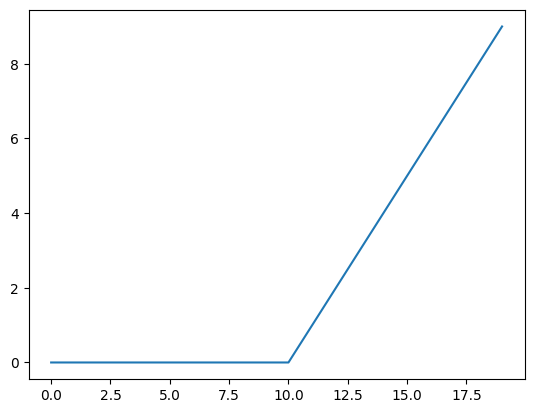

In [33]:
plt.plot(toy_after_relu)

## Softmax activation function.

- Softmax activation function calculates the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs.

- Softmax activation functions are mostly used at the output layers of an neural network and widely used in multi-class classification problems.

In [34]:
# Softmax activation function works as

def softmax(x):
    total = 0
    for i in range(len(x)):
        total += tf.exp(-x)
    
    return tf.exp(-x)/total

In [35]:
toy_after_softmax = softmax(toy_data)
toy_after_softmax

# Note: From this output we can see how softmax activation function converts those numbers into probabilities.
# Since, softmax activation function provides us the probabilities, it's plot is not used.

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.04999999, 0.05      , 0.05000001, 0.05000001, 0.05      ,
       0.05      , 0.05      , 0.04999999, 0.05000001, 0.05000001,
       0.05      , 0.05      , 0.05      , 0.05000001, 0.04999999,
       0.05      , 0.05      , 0.05      , 0.05000002, 0.05      ],
      dtype=float32)>

## There are number of type of activation function but majorly we use

- ### **Relu**

- ### **Sigmoid**

- ### **Softmax**

- ### **Linear**

#### Other types such as "elu", "LeakyRelu" and "Tanh" are also used sometimes. Information about all of these activation functions can be found at: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

---

## Evaluating and improving our classification model.
---

### The problem we were trying to solve was a very simple problem and we should not be using high number of neurons with it.

- In order to improve our model we can actually reduce the number of neurons in our model.

In [36]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")])


model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])

# Note: The default learning rate for "adam" is "0.001".
# But here we are using the learning rate of 0.01 which means our model will converge faster to the optimal value and learn quickly.
# Note: Increasing learning rate is always not desirable as doing so can lead to missing the optimal value.

history = model_6.fit(x_train, y_train, epochs = 25, verbose = 0)

### In model.compile(),

- **loss:** Tells us how much wrong our model is and we can use different types of metrics to represent that loss.

- **optimizer:** Tells us how our model can improve and reduce it's loss. We can use different type of optimizers based on our problem and can try numerous learning rate for those optimizers.

- **Learning rate:** it simply means the rate at which our model is improving it's performance.

- **Metrics:** specifies the metric we use to judge the performance of our model.

In [37]:
model_6.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9250 - loss: 0.2275 


[0.22752811014652252, 0.925000011920929]

### We got the accuracy of about 94% at just 25 epochs just because we used a faster learning rate and the accuracy of our model is still good even after decresing the number of neurons in our model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step
doing binary classification


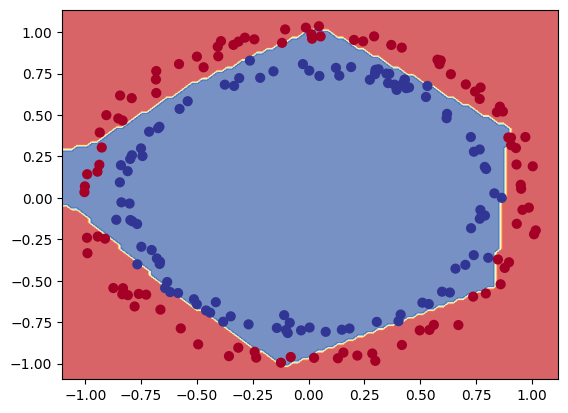

In [38]:
plot_decision_boundary(model_6, x_test, y_test)

## This is not as accuarte as the previous model but still well accepted considering the fact we only used 25 epochs.

## Now, we'll can to learn how to plot the training or loss curve of a model

- For this plot, we actually saved the results of our previous model into a variable called history.
- If we use "history.history" it actually returns loss and accuracy of our model at every epoch.
- Hence, we can actually convert it into a tabe, given as

In [39]:
result = pd.DataFrame(history.history)
result

# Again, we only used 25 epochs and it is returning the loss and accuracy of our model at every epoch.

,accuracy,loss
0,0.52375,0.688554
1,0.55125,0.680595
2,0.57375,0.672531
3,0.62375,0.661715
4,0.66000,0.646233
5,0.71750,0.626651
6,0.77625,0.600765
7,0.79000,0.570288
8,0.81250,0.534391
9,0.83125,0.496875


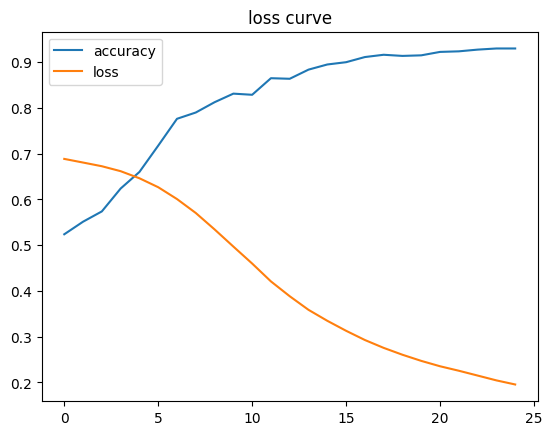

In [40]:
# now, we can actually plot those results to get our training or loss curves as
result.plot()
plt.title("loss curve");

## From this plot we can actually see our loss curve decreased and accuracy curve increased with the increase in number of apochs.import matplotlib.pyplot as plt

--- 

## Finding the best learning rate

This is to find the ideal learning rate (the rate at which the loss of our model descreases the most during training) for our model.

Learning rate callback works as : At the beginning of every epoch, this callback gets the updated learning rate value from **schedule function provided as input with the current epoch and current learning rate**, and applies the updated learning rate on the optimizer.

For this we'll be using the following steps:

1) A learning rate **callback** (A callback is like an extra layer of functionality that we can add to our model while it is training).

2) We'll create a new model but we could use the previous model as well.

3) A modified loss curve plot.


In [41]:
## now, creating a new model.

tf.random.set_seed(42)

model_7 = tf.keras. Sequential([tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(4, activation = "relu"),
                                tf.keras.layers.Dense(1, activation = "sigmoid")])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Note: A callback has to be executed before fitting our model so that it can work while training.
# Note: There are a number of types of callback but for this purpose we use "learning rate callback".

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10 **(epoch/20)))

# note: (1e-4) means 10**-4. This function is simply stating start the epoch with the learning rate of 10**-4
## and then increase the learning rate with 10**(epoch/20).



# Fitting our model
history = model_7.fit(x_train, y_train, callbacks = [lr_scheduler], epochs = 100)

## Note: callbacks function takes a list. so that means we can supply multiple callback functions to it.

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.4975 - loss: 0.7071 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.4963 - loss: 0.7067 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.4963 - loss: 0.7063 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.4950 - loss: 0.7059 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.4900 - loss: 0.7055 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.4900 - loss: 0.7050 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.4900 - loss: 0.7045 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.4925 - loss: 0.7039 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.4925 - loss: 

<Axes: xlabel='epochs'>

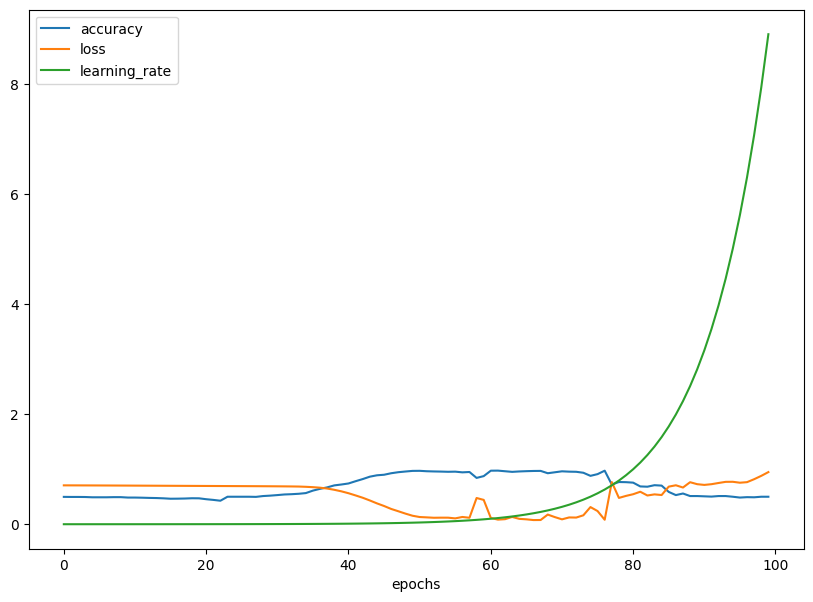

In [42]:
# Now, converting the output of our model in a datafram.
pd.DataFrame(history.history).plot(figsize = (10,7), xlabel = "epochs")

## From this plot we can see the learning rate values (y-axis) starts at very small and then increases exponentially.

1) Accuracy was first low and then increased(around 80 epochs) and then started to decrease with the increase in learning rate.

2) loss function values started to decrease(around 80 epochs) and then started to increase with the increase in learning rate.

3) So, the optimal value for learning rate would be around the learning rate at epochs 40.

In [43]:
# Trying to get the ideal value of our learning rate.

lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

# These are basically the 100 values we used for the 100 epochs of our model.

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

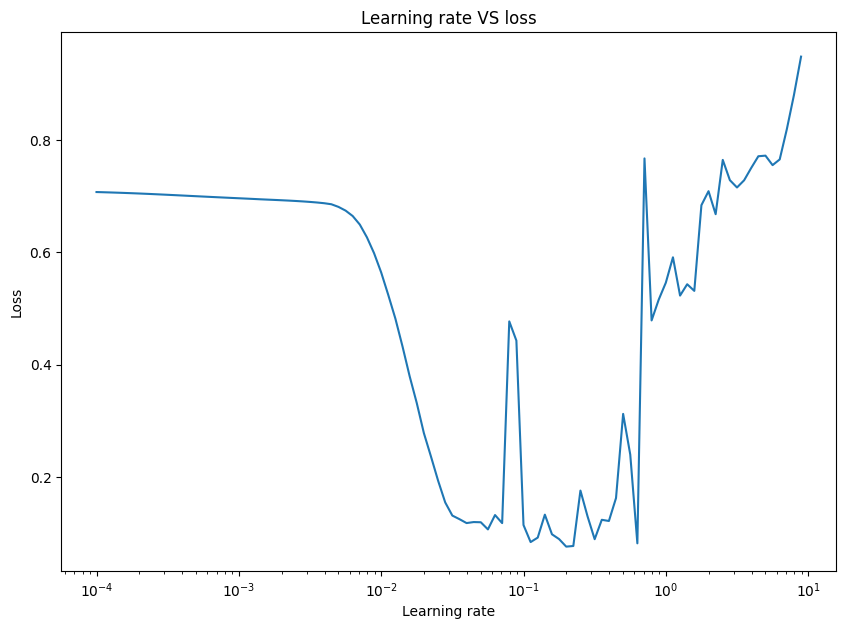

In [44]:
# now, we we'll create a plot of learning rate vs loss.

plt.figure(figsize = (10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate VS loss");

- ### The ideal learning rate is not where we see the least loss, it is around 10% less loss than that because it shows our loss is still decreasing.

- ### By using this method, we can see that our ideal learning rate lies around 0.01.


- ### Normally default learning rate works well for most of our problems. But if it doesn't, we can use a plot like this to get the answer.

- ### Or, we could try some learning rates given as : (1, 0.1, 0.01, 0.001, 0.0001)

In [45]:
# now, training and evaluating our model with the ideal learning rate, we obtained from the plot.

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")])

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics = ["accuracy"])

# note: we are using lr = 0.02 because it is very close to 0.01

history = model_8.fit(x_train, y_train, epochs = 25, verbose = 0)

In [46]:
model_8.evaluate(x_test, y_test)

# so, we could see our model performed much better with lr of 0.02 at the same number of epochs.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9850 - loss: 0.1004 


[0.10044080764055252, 0.9850000143051147]

## Most commonly used classification evaluation metrics/methods are

- ### Accuracy

- ### Precision

- ### Recall/Sensitivity

- ### F1-score

- ### Specificity

- ### Confusion matrix

In [47]:
# checking the accuracy of our last model

loss, accuracy = model_8.evaluate(x_test, y_test)
print(f"model loss on the test is: {loss}")
print(f"model accuracy on the test is: {(accuracy*100):.2f}%")


# Note The "f" in print statement allows us to use the result of loss and accuracy in that statement.
# In the second print statement ".2f" is used to get our result upto 2 decimal places.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9850 - loss: 0.1004
model loss on the test is: 0.10044080764055252
model accuracy on the test is: 98.50%


In [48]:
# we can also perform the above opeartion as

loss, accuracy = model_8.evaluate(x_test, y_test)
print("model loss on the test is:", loss)
print("model accuracy on the test is:", (accuracy*100), "%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9850 - loss: 0.1004
model loss on the test is: 0.10044080764055252
model accuracy on the test is: 98.50000143051147 %


In [49]:
y_pred = model_8.predict(x_test)
y_pred[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.9880134 ],
       [0.36969432],
       [0.99273103],
       [0.07497652],
       [0.75625217],
       [0.66466504],
       [0.00797546],
       [0.00153065],
       [0.95600057],
       [0.1670454 ]], dtype=float32)

In [50]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

### The predictions that our model is making are in "Prediction Probability" form while our true value "y_test" are in 0 and 1.

- We used a sigmoid activation function at the output layer of neural netwrok and sigmoid activation function actually outputs the probability for classification. So, we need to convert these probabilities into 1 and 0, to create a confusion matrix.

- Softmax activation function also outputs probabilities, So if we use softmax activation we would also need to deal with those probabilities.

In [51]:
# Now, converting our prediction probabilities into 0 and 1's.

y_pred_binary = tf.round(y_pred)
y_pred_binary[:10]

# Probabilities higher than 0.5 are converted into 1 while probabilities lower than 0.5 are converted into 0.

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

### Creating a confusion matrix for our classification problem.

- We'll use "scikit learn" confusion matrix.

In [52]:
# creating confusion matrix

confusion_matrix(y_test, y_pred_binary)

array([[98,  2],
       [ 1, 99]])

### From the confusion matrix, we can say out of the total 200 data records in x_test.

- ### 197 where correctly classified.

- ### Only 3 were incorrectly classified.

### But from this we can't say which record belongs to red circle and which record belongs to blue circle. So, we need to add axis to our confusion matrix, to make it more understandable.

In [53]:
# Now, we are trying to make our confusion matrix more understandable.

figsize = (10,10)

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

In [54]:
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalising our confusion matrix.

cm_norm # this is done to normalise our confusion matrix in the range of 0 & 1.

array([[0.98, 0.02],
       [0.01, 0.99]])

In [55]:
n_classes = cm.shape[0] # n_classes refers to the number of classes we are trying to classify.

n_classes, cm.shape  # Thus is a binary problem and we only have 2 classes.

(2, (2, 2))

### If we look at the shape of "cm", it is (2,2) and this means it have 2 lists ( representing 2 classes) and each list have 2 values (correctly classified and wrongly classified).

In [56]:
def plot_confusion_matrix(y_test, y_pred_binary):

    # Making our confusion matrix look good

    figsize = (10,10)

    # create the confusion matrix

    cm = confusion_matrix(y_test, y_pred_binary)

    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalising our confusion matrix.


    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot

    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes

    classes = False

    if classes :
      labels = classes

    else:
      labels = np.arange(cm.shape[0])


    # Label the axis

    ax.set(title = "Confusion matrix",
          xlabel = "Predicted values",
          ylabel = "True value",
          xticks = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels)


    # Setting x-axis labels to the bottom

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjusting label Size

    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    # setting a threshold for different colour

    threshold = (cm.max() + cm.min())/2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                                  horizontalalignment = "center",
                                  color = "white" if cm[i,j] > threshold else "black",
                                  size = 15)

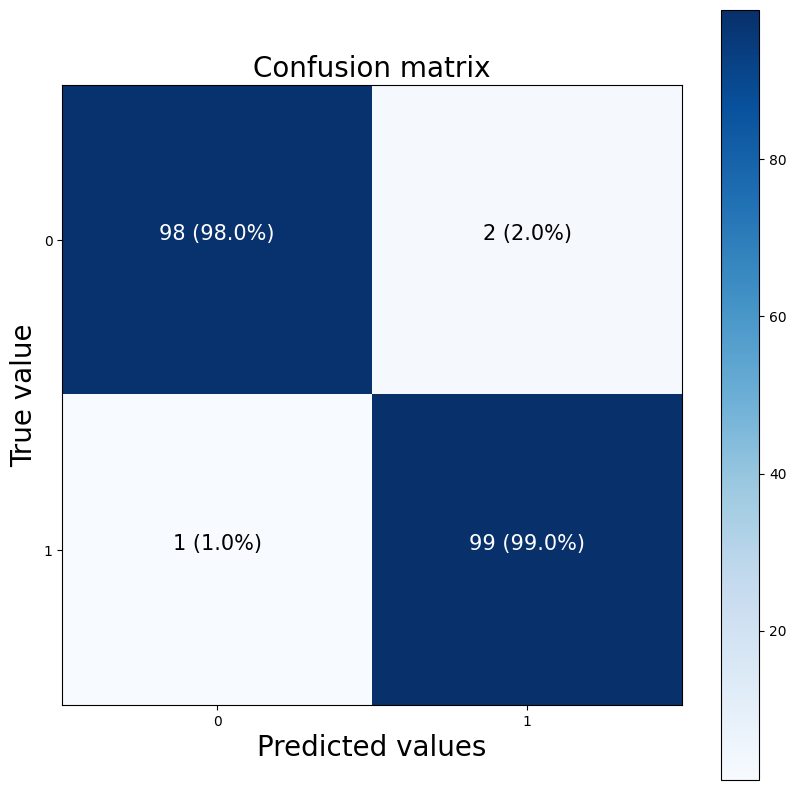

In [57]:
plot_confusion_matrix(y_test, y_pred_binary)

### Now, we'll work with a larger dataset (Multi-class classification)

- When we have more than two classes as options, it means we have a **multi-class classification problem**.

- To practice multi-class classification problem, we are going to build a neural network to classify images of different types of clothing item.

- For this we can use the famous **MNIST** dataset.

#### Note: MNIST dataset is a built in dataset in tensorflow.

In [58]:
# The dataset has already been divided into training and test set.

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [59]:
print(f"Training sample:\n {train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

### This array of number represents the first image in our training data and the training label for that image is 9(Ankle boots).

In [60]:
# Checking the shape of a single image.

train_data[0].shape, train_labels[0].shape

# This shows the image is a 28*28 tensor and label is a scalar and hence no shape.

# This 28*28 means every image have 28 list and each list have 28 values in it.

((28, 28), ())

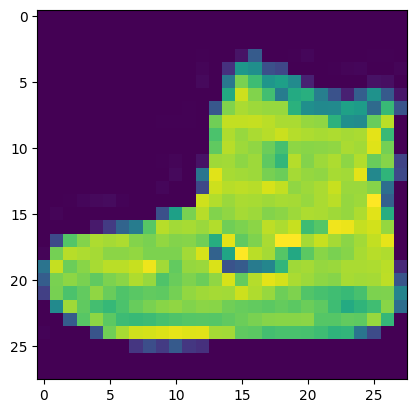

In [61]:
# plotting a single image

plt.imshow(train_data[0])

### Creating a list of all the classes that we are trying to classify, so that we can use the numerical values of the labels as index of our list.

In [62]:
classes = ["Tshirt/Top", "Trouser", "Pullover", "Dress", "coat", "sandal", "shirt", "sneaker", "bag", "Ankle boot"]
len(classes)

10

Text(0.5, 1.0, 'Dress')

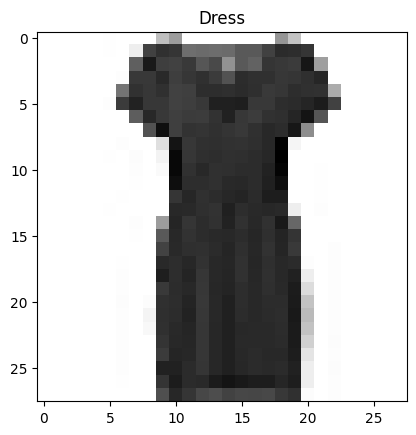

In [63]:
# Plotting an example with it's label

index =20

plt.imshow(train_data[index], cmap = plt.cm.binary)
plt.title(classes[train_labels[index]])

# Note: we used "cmap = plt.cm.binary" to get a grey scale image, because the dataset we are using is a grey scale image.

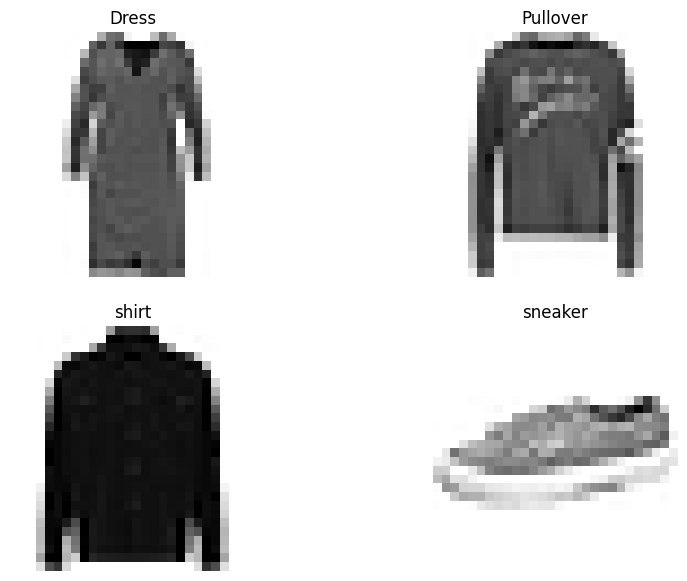

In [64]:
# Now we'll try to plot multiple random images from the Fashion MNIST dataset instead of trying a single image at a time.

plt.figure(figsize = (10,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(classes[train_labels[rand_index]])
  plt.axis(False)


# we can use this cell to view multiple images from any datasets at a same time to familiarize ourself with the data.
# This is much better then viewing a single image at a time.

### Now, we'll be build a multi-class classification model.

- For our multi-class classification model we can use the simialar architecture as of a binary classification model but we'll need to change some functions in the architecture.

1) **Input shape of a image:** 28*28

2) **output shape:** Since we have to classify 10 different objects we we'll have 10 neurons in the output layer of neural network.

3) **Loss function:** if our labels or true values are one hot encoded then we can use `tf.keras.losses.CategoricalCrossentropy()` and if our true values are in the integer format just like in this example, then we must use `tf.keras.losses.SparseCategoricalCrossentropy()`

4) **output activation function:** `softmax` or `tf.keras.activations.softmax`

---

### Now, we'll introduce a new layer in our NN, that layer is called "Flatten" layer and it is used as the first layer bcoz it deal's directly with the input.
- The input shape of our image is 28*28 which means our single image consist of 28 list and each list consisit of 28 elements.
- But our neural network like data to be in a single long vector and we can do this by using flatten layer.
- Flatten layer are mostly used in all classification problem.
- Our flatten layer will actually convert that input of (28*28) into a single vector of shape (none, 784) without affecting the batch size.

---

### Note:
- if we want to use CategoricalCrossentropy then we must convert our training and testing labels into one hot encoded form as `tf.one_hot(train_labels, depth = 10` and `tf.one_hot(test_labels, depth = 10)`
- depth = 10, will be used because we have 10 classes.

In [65]:
# Creating the model

tf.random.set_seed(42)

multi_model_1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                     tf.keras.layers.Dense(10, activation = "relu"),
                                     tf.keras.layers.Dense(10, activation = "relu"),
                                     tf.keras.layers.Dense(10, activation = "softmax")])


multi_model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])


history_1 = multi_model_1.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10


/Users/harish./Desktop/git_repos/new_tfhub_env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.1265 - loss: 2.4158 - val_accuracy: 0.1514 - val_loss: 2.1816
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.1608 - loss: 2.1606 - val_accuracy: 0.1790 - val_loss: 2.1155
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - accuracy: 0.1840 - loss: 2.0678 - val_accuracy: 0.2013 - val_loss: 2.0117
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.2190 - loss: 1.8808 - val_accuracy: 0.2207 - val_loss: 1.7772
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 339us/step - accuracy: 0.2534 - loss: 1.7262 - val_accuracy: 0.2875 - val_loss: 1.6611
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.2767 - loss: 1.6589 - val_accuracy: 0.3002 - val_loss: 1.6311
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 338us/step - accuracy: 0.2938 - loss: 1.6211 - val_accuracy: 0.3031 - val_loss: 1.6014
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 338us/step - accuracy: 0.3496 - loss: 1.53

### Note:
- We don't have a specific validation dataset, so we'll use our test data and labels as validation dataset.

- validation_data is a new parameter we are using to find how our model performs on the data that it has not seen before at each epoch during training.

In [66]:
multi_model_1.evaluate(test_data, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.4439 - loss: 1.3750


[1.3749991655349731, 0.4438999891281128]

### As discussed before, to make our data ready to be used in NN, we should performing scaling on NN, because NN prefers scaled data.

- By scaling, I mean either normalisation or standarisation and neural networks tends to prefer normalisation.

In [67]:
# checking the min and max of our training data

train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

### To perform scaling on our data, we can actually divide our (training and testing) data by the maximum value in the tensor. So that all the values stay between 0 & 1.

In [68]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), train_data_norm.max() # Note: we used different variable names so that we don't alter the original data.

(np.float64(0.0), np.float64(1.0))

In [69]:
# Now, we'll try to fit the same model as above but on the normalised dataset.

tf.random.set_seed(42)

multi_model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                     tf.keras.layers.Dense(10, activation = "relu"),
                                     tf.keras.layers.Dense(10, activation = "relu"),
                                     tf.keras.layers.Dense(10, activation = "softmax")])


multi_model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer =  tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])


history_2 = multi_model_2.fit(train_data_norm, train_labels, epochs = 10, validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.7452 - loss: 0.7339 - val_accuracy: 0.8209 - val_loss: 0.5213
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.8364 - loss: 0.4666 - val_accuracy: 0.8357 - val_loss: 0.4687
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 338us/step - accuracy: 0.8484 - loss: 0.4268 - val_accuracy: 0.8425 - val_loss: 0.4482
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.8556 - loss: 0.4078 - val_accuracy: 0.8453 - val_loss: 0.4382
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - accuracy: 0.8597 - loss: 0.3953 - val_accuracy: 0.8480 - val_loss: 0.4297
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.8623 - loss: 0.3860 - val_accuracy: 0.8499 - val_loss: 0.4237
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.8645 - loss: 0.3790 - val_accuracy: 0.8510 - val_loss: 0.4201
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.8668 -

### Note: From the output of the previous model we can say that NN clearly prefers data to be in normalised form, because the accuracy of the same model increased from 45% to 85% just by normalising the data and keeping everything same.

<Axes: title={'center': 'normalised data'}>

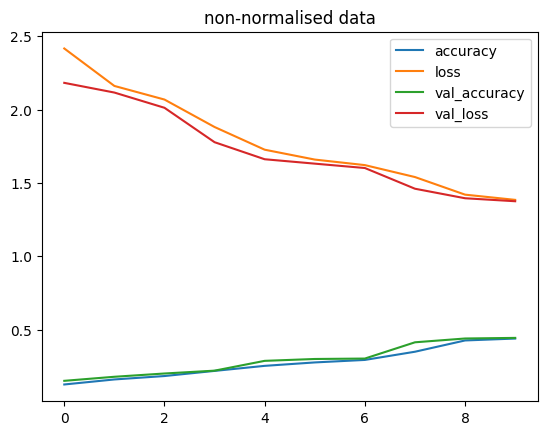

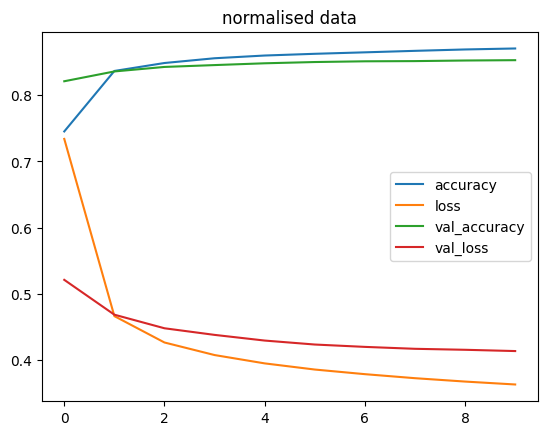

In [70]:
# plotting non-normalised data loss or traing curve

pd.DataFrame(history_1.history).plot(title = "non-normalised data")

# plotting normalised data loss or traing curve

pd.DataFrame(history_2.history).plot(title = "normalised data")

### From the two plots above we can see how our model on normalised data performed much better in comparison to the non normalised data.

In [71]:
# Now, we'll try to improve our model by finding the ideal learning rate for it.

tf.random.set_seed(42)

multi_model_3 = tf.keras.Sequential([
                                     tf.keras.layers.Flatten(input_shape = (28,28)),
                                     tf.keras.layers.Dense(10,activation = "relu"),
                                     tf.keras.layers.Dense(10, activation = "relu"),
                                     tf.keras.layers.Dense(10, activation = "softmax")
                                      ])


multi_model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10 **(epoch/20)))


history_3 = multi_model_3.fit(train_data_norm, train_labels, callbacks = [lr_scheduler], epochs = 100, validation_data = (test_data_norm, test_labels))

Epoch 1/100


/Users/harish./Desktop/git_repos/new_tfhub_env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step - accuracy: 0.5735 - loss: 1.3188 - val_accuracy: 0.7180 - val_loss: 0.8439 - learning_rate: 1.0000e-04
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.7556 - loss: 0.7171 - val_accuracy: 0.7703 - val_loss: 0.6608 - learning_rate: 1.1220e-04
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.7948 - loss: 0.6032 - val_accuracy: 0.7982 - val_loss: 0.5890 - learning_rate: 1.2589e-04
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step - accuracy: 0.8140 - loss: 0.5469 - val_accuracy: 0.8107 - val_loss: 0.5488 - learning_rate: 1.4125e-04
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.8244 - loss: 0.5121 - val_accuracy: 0.8210 - val_loss: 0.5229 - learning_rate: 1.5849e-04
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.8325 - loss: 0.4879 - val_accuracy: 0.8275 - val_loss: 0.5047 - learning_rate: 1.7783e-04
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 

<Axes: xlabel='epochs'>

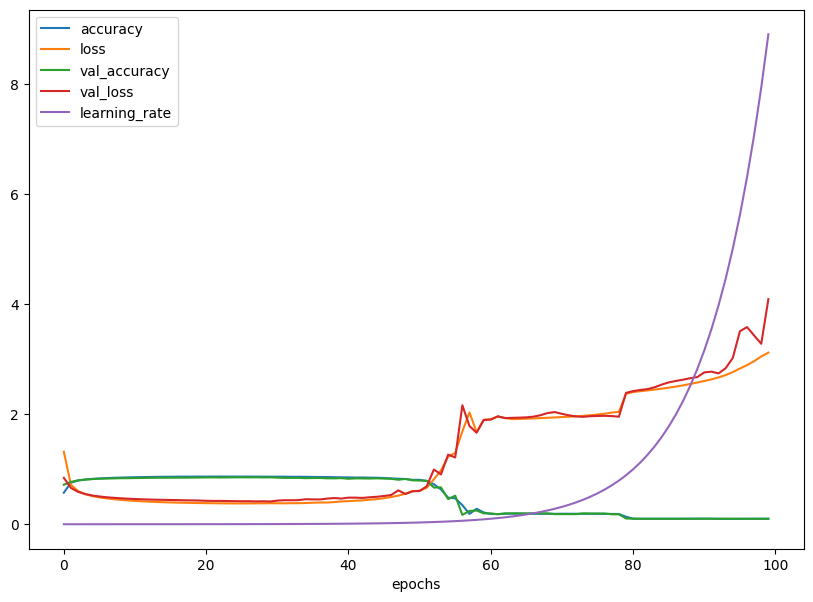

In [72]:
# Now, converting the output of our model in a datafram.
pd.DataFrame(history_3.history).plot(figsize = (10,7), xlabel = "epochs")

### From this plot we can say that the highest accuracy and the smallest loss value is around 40 epochs.

- But nothing more can be interpreted from this.

In [73]:
# Trying to get the ideal value of our learning rate.

lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

# These are the 100 different values of learning rate that we used for the 100 epochs of our model.

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

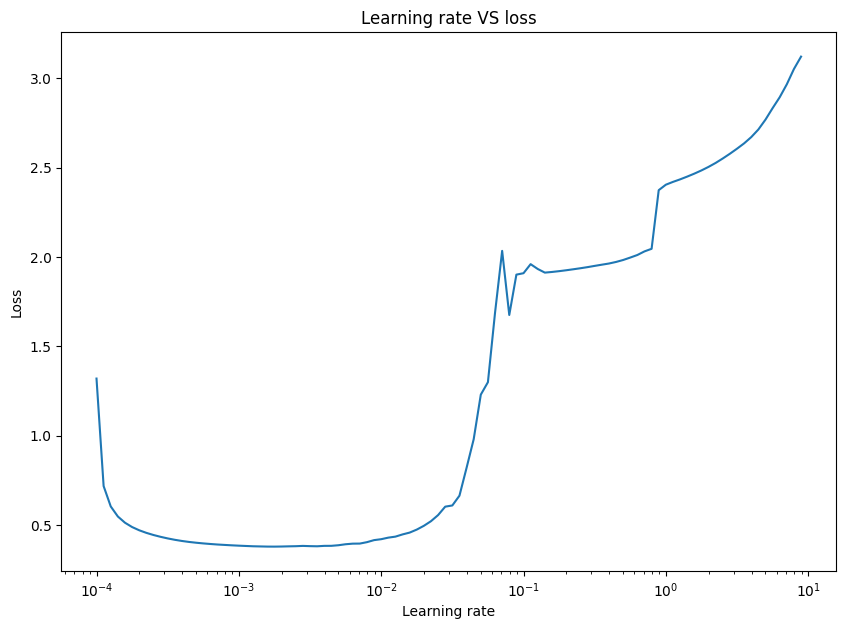

In [74]:
# now, we we'll create a plot of learning rate vs loss.

plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate VS loss");

### From this plot, we can see that the lowest value of loss is between 0.001 and 0.01. So we could take 0.001 as our ideal learning rate.

- ### Note: 0.001 is actually the default learning rate of Adam().

In [75]:
# Now, we'll try to fit the same model as above, on the normalised dataset and with the ideal learning rate of 0.001.

# this model is exactly the same as multi_model_2 because the default learning rate for Adam is 0.001.

# We just changed the number of epochs for this model.

tf.random.set_seed(42)

multi_model_4 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                     tf.keras.layers.Dense(10, activation = "relu"),
                                     tf.keras.layers.Dense(10, activation = "relu"),
                                     tf.keras.layers.Dense(10, activation = "softmax")])


multi_model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer =  tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics = ["accuracy"])


history_4 = multi_model_4.fit(train_data_norm, train_labels, epochs = 20, validation_data = (test_data_norm, test_labels))

Epoch 1/20


/Users/harish./Desktop/git_repos/new_tfhub_env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - accuracy: 0.7489 - loss: 0.7126 - val_accuracy: 0.8175 - val_loss: 0.5212
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 346us/step - accuracy: 0.8328 - loss: 0.4808 - val_accuracy: 0.8293 - val_loss: 0.4893
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 346us/step - accuracy: 0.8418 - loss: 0.4533 - val_accuracy: 0.8347 - val_loss: 0.4751
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 344us/step - accuracy: 0.8473 - loss: 0.4373 - val_accuracy: 0.8373 - val_loss: 0.4671
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - accuracy: 0.8510 - loss: 0.4249 - val_accuracy: 0.8395 - val_loss: 0.4609
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - accuracy: 0.8544 - loss: 0.4150 - val_accuracy: 0.8417 - val_loss: 0.4564
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 347us/step - accuracy: 0.8571 - loss: 0.4075 - val_accuracy: 0.8419 - val_loss: 0.4539
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - accuracy: 0.8592 - loss: 0.40

## Further work we can do on our multi-class classification model.


1) We could evaluate our multi-class classification model's performance using other classification metrics(such as a confusion matrix.)

2) Assess some of it's prediction using visualisation.

3) We can actually try to improve our model by changing architecture or training it for longer time.

4) Save and export it to be used in an application.

# Making a confusion matrix for our problem.

In [76]:
def make_confusion_matrix(y_test, y_pred, classes = None, figsize = (10,10), text_size = 15):

    # create the confusion matrix

    cm = confusion_matrix(y_test, y_pred)

    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalising our confusion matrix.


    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot

    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)


    if classes :
      labels = classes

    else:
      labels = np.arange(cm.shape[0])


    # Label the axis

    ax.set(title = "Confusion matrix",
          xlabel = "Predicted values",
          ylabel = "True value",
          xticks = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels)


    # Setting x-axis labels to the bottom

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjusting label Size

    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # setting a threshold for different colour

    threshold = (cm.max() + cm.min())/2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                                  horizontalalignment = "center",
                                  color = "white" if cm[i,j] > threshold else "black",
                                  size = 15)


In [77]:
classes

['Tshirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'Ankle boot']

In [78]:
# making some predictions with our model

y_prob = multi_model_4.predict(test_data_norm)
y_prob[0]

# Note(Important): As our model was trained on a normalised dataset then we should also make predictions on the normalised test data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step


array([3.3262597e-05, 8.5296818e-09, 6.8607045e-07, 4.0532372e-10,
       7.2561397e-07, 8.0400698e-02, 1.0214551e-05, 8.0204919e-02,
       6.7969027e-05, 8.3928156e-01], dtype=float32)

### Now, the prediction that we have is actually a list of 10 values and each value actually represents the probability of that class to be the class of the current image.

- The index of the highest value in this list represents the index of the class to which this image belongs. 

In [79]:
classes[tf.argmax(y_prob[0])]

# Note: "tf.argmax()" returns the index with the largest value across the axes of a tensor.

# So, ankle boot is the class to which the first image belongs, according to our predictions.

'Ankle boot'

In [80]:
# Converting our all prediction probabilities into integers.

y_pred = y_prob.argmax(axis =1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [81]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

From the output of our prediction and test_labels we can see that our model is performing really well. It preidcted all the first 10 images correctly

In [82]:
confusion_matrix(y_true = test_labels, y_pred = y_pred)

# from this we can see our model performed well on all classes but still this matrix is not the understandable.

array([[748,   8,  26,  54,   9,   3, 139,   0,  12,   1],
       [  2, 961,   5,  25,   5,   0,   1,   0,   1,   0],
       [ 11,   3, 757,  14, 152,   0,  60,   0,   3,   0],
       [ 22,  16,  16, 868,  45,   1,  27,   0,   5,   0],
       [  1,   2,  98,  29, 811,   0,  54,   0,   5,   0],
       [  0,   1,   0,   0,   0, 936,   0,  31,   3,  29],
       [103,   4, 129,  41, 129,   1, 572,   0,  21,   0],
       [  0,   0,   0,   0,   0,  29,   0, 948,   0,  23],
       [  6,   0,   6,   7,   3,   6,  12,   4, 955,   1],
       [  0,   0,   0,   0,   0,  16,   0,  54,   1, 929]])

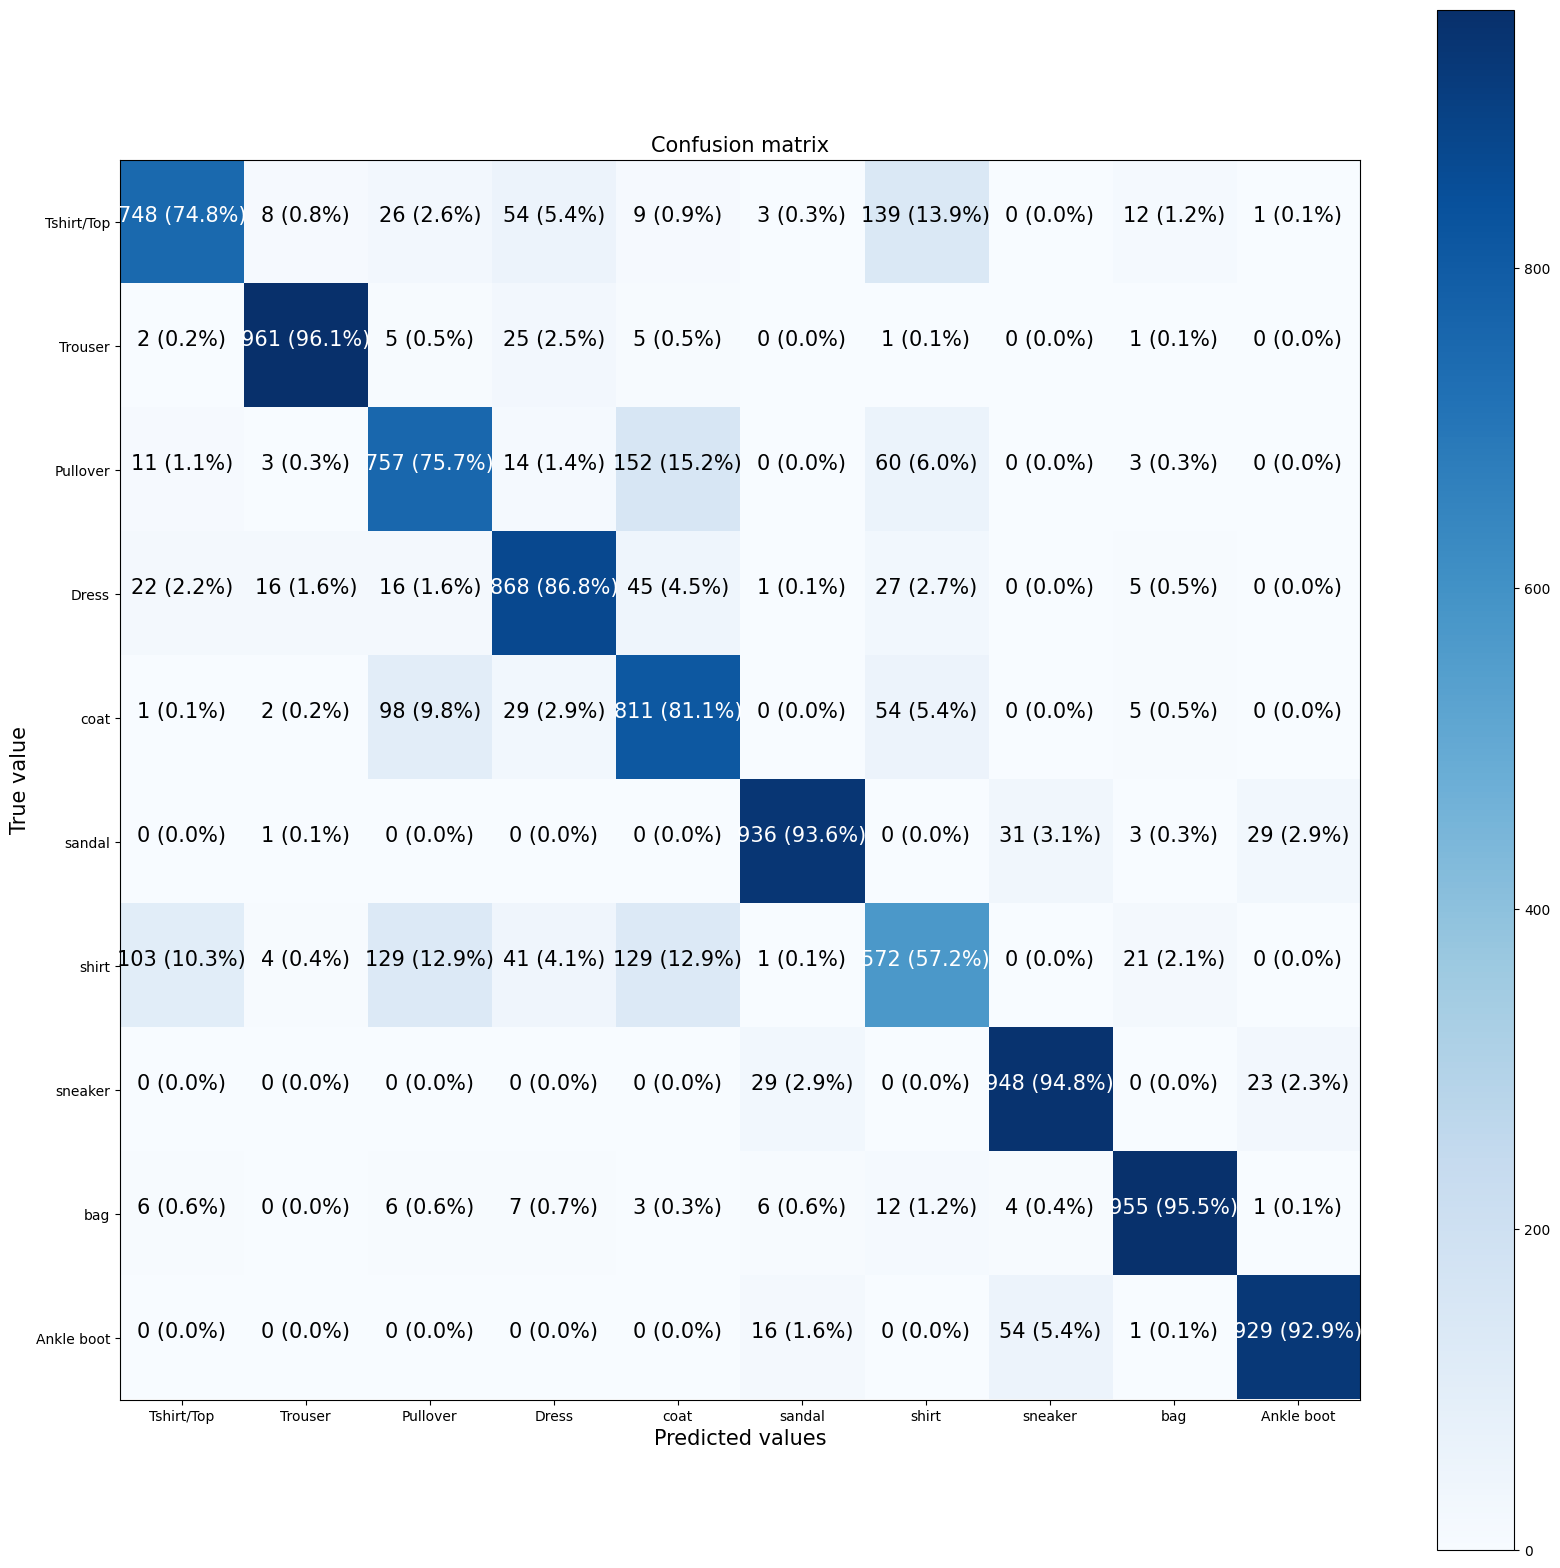

In [83]:
# So, we'll use the confusion matrix function that we created for our use.

make_confusion_matrix(test_labels, y_pred, classes = classes, figsize=(20,20), text_size =  15 )

# Now to evaluate our model we can create a function
1) To plot a random image.

2) Make a prediction on the selected image.

3) Then label that image with it's true and predicted value.


In [84]:
def Evaluate(model, images, true_labels, classes):
  # selecting a random image.

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plotting the image

  plt.imshow(target_image, cmap = plt.cm.binary)

  # changing the colour of the images depending on whether our prediction is right or wrong.

  if pred_label == true_label:
    color = "green"

  else:
    color = "red"

  # Adding xlabel information

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


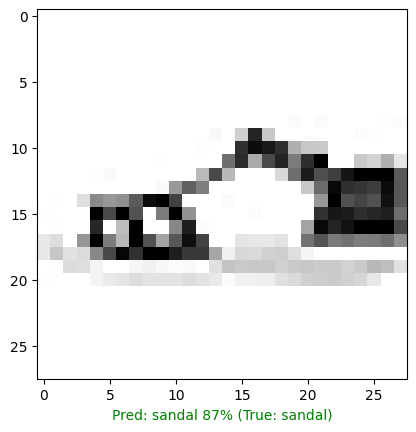

In [85]:
# checking out a random image and it's prediction.

Evaluate(multi_model_4,
         images = test_data_norm, # Always make sure that we make predictions on the same data that we trained our model on(normalised images in this case).
         true_labels = test_labels,
         classes = classes)

### Now, we'll try to find the pattern's our neural network is learning.

In [86]:
# first we'll find the layers of our most recent model as

multi_model_4.layers

# we used 1 flatten layer, 2 hidden layers, 1 output layer.

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_30, built=True>,
 <Dense name=dense_31, built=True>,
 <Dense name=dense_32, built=True>]

In [87]:
# Extracting a particular layer from our model

multi_model_4.layers[1]

# Extracting the first hidden layer in our network.

<Dense name=dense_30, built=True>

In [88]:
# now, we'll try to find the patterns learned by this particular layer.

weights, biases = multi_model_4.layers[1].get_weights()

weights.shape, biases.shape

((784, 10), (10,))

### Note: 

- Every connection in a fully connected neural network have a specific weight attach with it.
- Every neuron in the hidden layer of a neural network have a specific bias attach to it.
- The input that we fed into our neural network was 28*28 that means there were 28 list containing 28 values each.
- Then we fed that input to a flatten layer and it actually convert that $28*28$ input into $1*784$ and this means a single list with 784 values.
- This means we have 784 input values and then we fed that input into a hidden layer with 10 neurons and as discussed, every input value(784) will go to each neuron (10) and will be forming 784*10 connection and every connection will have a specific weight attach with it.
- So, we have a weight matrix with 784 lists containing 10 values each. Each list represent a input value and every value is fed into the 10 neurons. Hence, weights.shape is (784, 10).
- As discussed, every neuron in the hidden layer have a specific bias term attached with it and as this layer had 10 neurons we have a bias vector of shape (10,1), this means 10 lists with a single value.

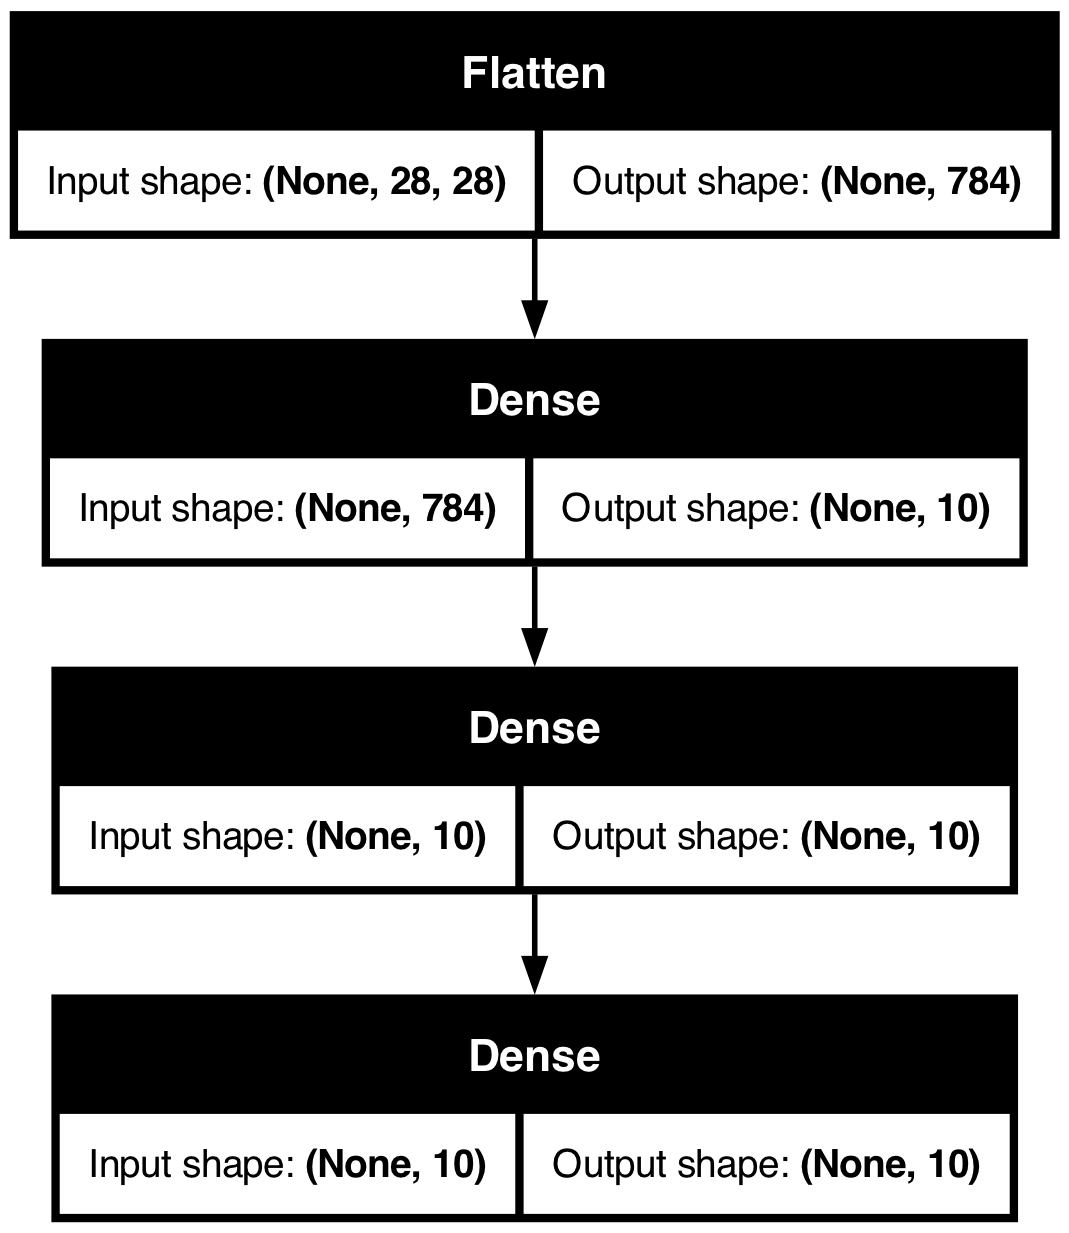

In [89]:
# Let's check another way of viewing our deep learning model.

from tensorflow.keras.utils import plot_model

plot_model(multi_model_4, show_shapes = True)

## From this we can see how each layer of NN works.

### Additional Notes: 

 When we run into a shape error always check

1) input shape

2) output shape

3) loss function